In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,0,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [12]:
dummy = pd.get_dummies(df['Geography'])

In [13]:
pd.DataFrame(dummy)

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9997,True,False,False
9998,False,True,False
9999,False,True,False
10000,True,False,False


In [14]:
dummy['France'] = le.fit_transform(dummy['France'])
dummy['Germany'] = le.fit_transform(dummy['Germany'])
dummy['Spain'] = le.fit_transform(dummy['Spain'])

In [15]:
df = pd.merge(df,dummy,left_index=True,right_index=True)

In [16]:
df.drop(['Geography'],axis=1,inplace=True)

In [17]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
4,850,0,43.0,2,125510.82,1,NaN,1.0,79084.10,0,0,0,1


In [18]:
df.isna().sum()

,0
CreditScore,0
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0
Exited,0


In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
5,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
SC = StandardScaler()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [27]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
5,645,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9999 non-null   int64  
 1   Gender           9999 non-null   int64  
 2   Age              9999 non-null   float64
 3   Tenure           9999 non-null   int64  
 4   Balance          9999 non-null   float64
 5   NumOfProducts    9999 non-null   int64  
 6   HasCrCard        9999 non-null   float64
 7   IsActiveMember   9999 non-null   float64
 8   EstimatedSalary  9999 non-null   float64
 9   Exited           9999 non-null   int64  
 10  France           9999 non-null   int64  
 11  Germany          9999 non-null   int64  
 12  Spain            9999 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 1.1 MB


In [29]:
X_test

array([[-0.03013138,  0.91198654, -0.65797313, ..., -1.00702568,
        -0.57916506,  1.7546143 ],
       [-0.16497787,  0.91198654, -0.84877497, ..., -1.00702568,
         1.72662349, -0.56992582],
       [ 0.20844318, -1.09650741, -1.70738323, ..., -1.00702568,
         1.72662349, -0.56992582],
       ...,
       [-1.54456119, -1.09650741, -1.0395768 , ...,  0.99302334,
        -0.57916506, -0.56992582],
       [ 0.79969317, -1.09650741, -0.65797313, ...,  0.99302334,
        -0.57916506, -0.56992582],
       [-1.46157874,  0.91198654, -1.13497772, ...,  0.99302334,
        -0.57916506, -0.56992582]])

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime


In [43]:
model = Sequential([
  Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid')
]
)



In [44]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [51]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

<Axes: >

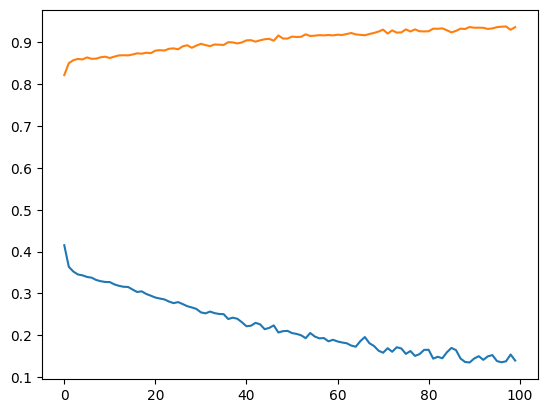

In [56]:
model.history.history.keys()
sns.lineplot(x=model.history.epoch,y=model.history.history['loss'])
sns.lineplot(x=model.history.epoch,y=model.history.history['accuracy'])

In [52]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7976 - loss: 0.4534 - val_accuracy: 0.8543 - val_loss: 0.3719
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8425 - loss: 0.3712 - val_accuracy: 0.8571 - val_loss: 0.3703
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8605 - loss: 0.3525 - val_accuracy: 0.8571 - val_loss: 0.3504
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3580 - val_accuracy: 0.8600 - val_loss: 0.3431
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8513 - loss: 0.3534 - val_accuracy: 0.8607 - val_loss: 0.3454
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8608 - loss: 0.3410 - val_accuracy: 0.8629 - val_loss: 0.3443
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8635 - loss: 0.3293 - val_accuracy: 0.8557 - val_loss: 0.3676
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8583 - loss: 0.3306 - val_acc